In [1]:
import biobalm
import ginsim
import biolqm

In [31]:
import numpy as np

import biobalm.succession_diagram


sd = biobalm.succession_diagram.SuccessionDiagram.from_file('../calzone_cellfate.bnet')
sd.build()
test = sd.summary()


In [ ]:
test

In [33]:
import pandas as pd
import re

# Extract state order
state_order_match = re.search(r"State order:\s*(.*)", test)
state_order = state_order_match.group(1).split(", ") if state_order_match else []

# Extract binary vectors (minimal trap space & motif avoidance)
binary_vectors = re.findall(r"(?:minimal trap space|motif avoidance in) ([01*]+)", test)
binary_vectors += re.findall(r"\.\.\.+([01*]+)", test)

# Convert to DataFrame
df = pd.DataFrame([list(vec) for vec in binary_vectors], columns=state_order)

df

,ATP,Apoptosis,BAX,BCL2,CASP3,CASP8,Cyt_c,DISC_FAS,DISC_TNF,FADD,FASL,IKK,MOMP,MPT,NFkB,NonACD,RIP1,RIP1K,RIP1ub,ROS,SMAC,Survival,TNF,TNFR,XIAP,apoptosome,cFLIP,cIAP
0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
1,*,*,*,0,*,*,*,0,0,0,0,0,*,*,0,*,0,0,0,*,*,0,0,0,0,*,0,0
2,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1
4,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
71,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
73,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1]:
import pystablemotifs as sm
import pyboolnet
import pystablemotifs.export as ex
import networkx as nx

In [14]:
from pyboolnet.file_exchange import bnet2primes, primes2bnet
from pyboolnet.prime_implicants import find_constants, create_variables
from pyboolnet.repository import get_primes

primes = bnet2primes("/home/spankaew/Git/astrologics/models/test_bonesis/bn0.bnet")

In [24]:
max_simulate_size = 100
ar = sm.AttractorRepertoire.from_primes(primes, max_simulate_size=max_simulate_size)
df=ex.attractor_dataframe(ar)
df

,Aldh1L1,Brn2,Hes5,Mash1,Myt1L,Olig2,Pax6,Scl,Sox8,Stat3,Tuj1,Zic1
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,1,1
2,0,0,1,0,0,1,1,0,1,0,0,0
3,1,0,1,0,0,0,1,1,0,1,0,0


{0: <pystablemotifs.reduction.MotifReduction at 0x7f292b3d7aa0>,
 1: <pystablemotifs.reduction.MotifReduction at 0x7f292b3ca000>,
 2: <pystablemotifs.reduction.MotifReduction at 0x7f292b3cb0b0>,
 3: <pystablemotifs.reduction.MotifReduction at 0x7f292b3d6240>,
 4: <pystablemotifs.reduction.MotifReduction at 0x7f292b3d4bc0>,
 5: <pystablemotifs.reduction.MotifReduction at 0x7f292b3b8980>,
 6: <pystablemotifs.reduction.MotifReduction at 0x7f292b3bbb00>}

In [21]:
import matplotlib.pyplot as plt
for a in ar.attractors:
    if a.n_unfixed == 0: continue # skip steady states
    print(a.attractor_dict)
    nx.draw(a.stg,with_labels=True)

plt.show()

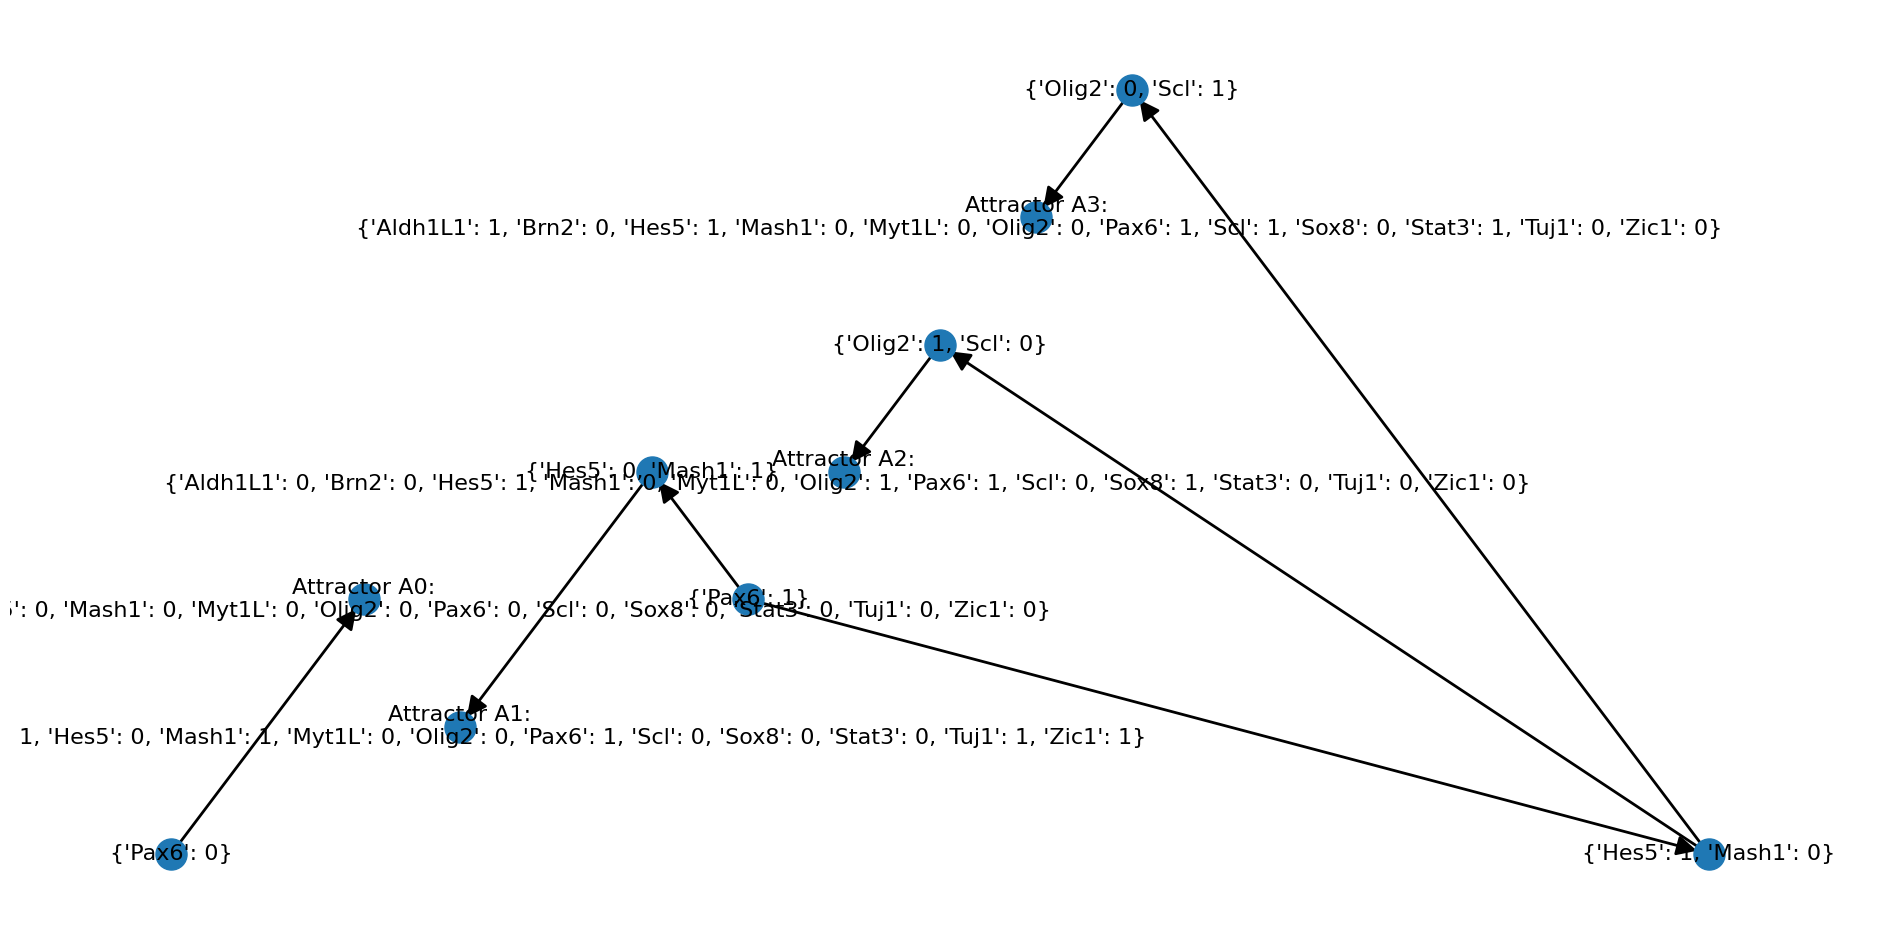

In [19]:
GM=ex.networkx_succession_diagram_motif_based(ar,include_attractors_in_diagram=True)
ex.plot_nx_succession_diagram(GM)

In [13]:
# Extract states from GM nodes
states = [data['states'] for _, data in GR.nodes(data=True) if 'states' in data]

# Convert to DataFrame
states_df = pd.DataFrame(states)
# Convert values to int or logical value
states_df = states_df.map(lambda x: int(x) if pd.notnull(x) else '*')
states_df_strings = states_df.apply(lambda row: ''.join(row.astype(str)), axis=1)
states_df_dict = pd.Series(list(states_df_strings.astype(str)), index=list(GR.nodes()), ).to_dict()

# Set the index to the keys
states_df.index = states_df_strings
states_df.fillna('*',inplace=True)

states_df

NameError: name 'pd' is not defined

In [229]:
# Create adjacency matrix
adj_matrix = nx.adjacency_matrix(GR)

# Convert to DataFrame for better readability
adj_df = pd.DataFrame(adj_matrix, index=states_df_strings, columns=states_df_strings)

,***************,000************,00000000*******,0000000000*****,0000000000111**,000000000011110,000000000011101,000000000000000,0000000000111**,000000000011110,...,000000000011110,0000000000111**,000000000011110,000000000011101,011000000100000,000000000011110,000000000011101,000000000000000,000000001100000,011000000100000
***************,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
000************,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00000000*******,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0000000000*****,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0000000000111**,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000000000011110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
000000000011101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
000000000000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
0000000000111**,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
000000000011110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


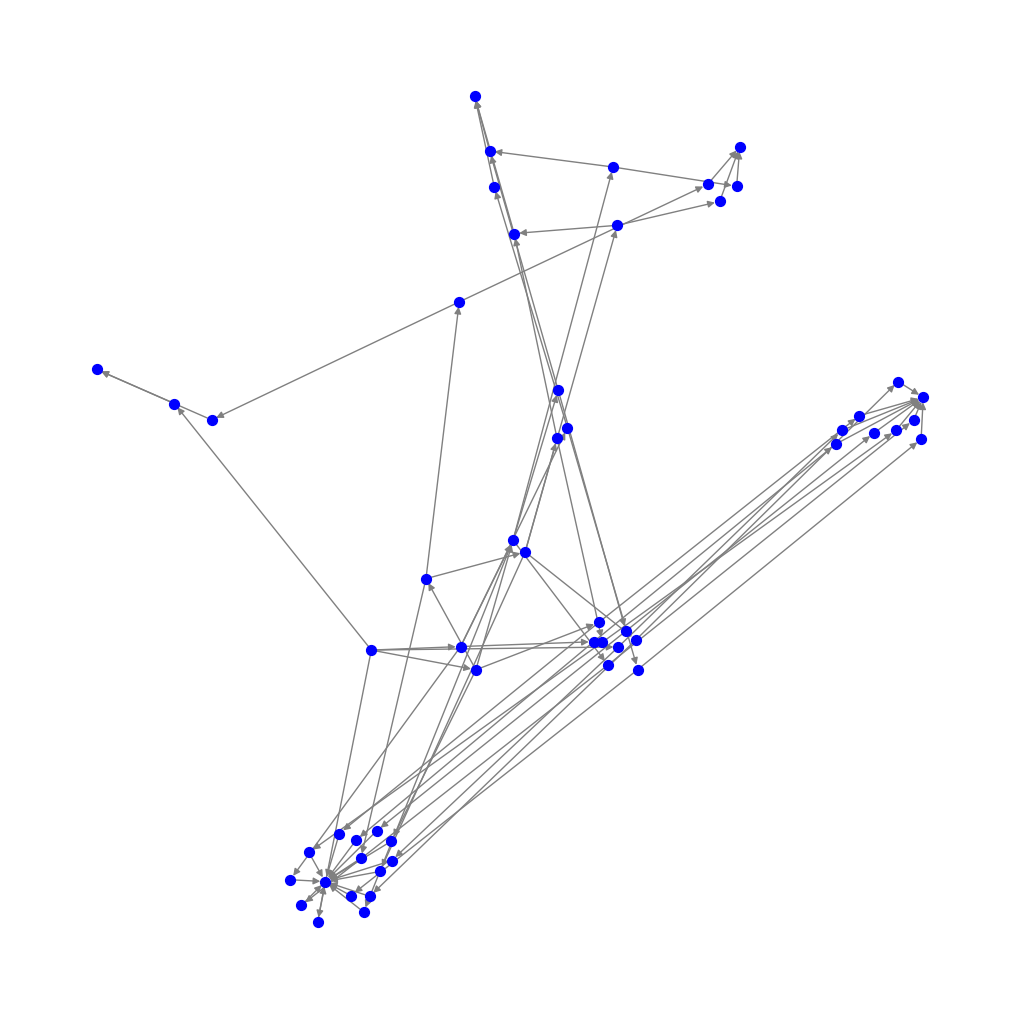

In [230]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(GR)  # You can change this to any other layout, e.g., circular_layout, shell_layout, etc.
nx.draw(GR, pos, with_labels=False, node_size=50, node_color='blue', edge_color='gray')
plt.show()

Now, as we have already a proof of concept for constructing the succession diagram from the model and able to convert them into two matrices 

1. The matrix which indicates the states 
2. The adjacencies matrix 

I want to then find a way to utilize this approach iteratively to the cohort of Boolean models 

In [346]:
states_df_strings

0    ****************
1    00011101********
2    0001110111100010
3    0001110100011101
4    0001110111100010
5    0001110100011101
dtype: object

In [322]:
def calculate_SD_matrix(GM): 
    # Extract states from GM nodes
    states = [data['states'] for _, data in GM.nodes(data=True) if 'states' in data]

    # Convert to DataFrame
    states_df = pd.DataFrame(states)
    # Convert values to int or logical value
    states_df = states_df.map(lambda x: int(x) if pd.notnull(x) else '*')
    states_df = states_df[list(primes.keys())]
    states_df_strings = states_df.apply(lambda row: ''.join(row.astype(str)), axis=1)
    states_df_dict = pd.Series(list(states_df_strings.astype(str)), index=list(GM.nodes()), ).to_dict()

    # Set the index to the keys
    states_df.index = states_df_strings
    states_df.fillna('*',inplace=True)

    # Create adjacency matrix
    adj_matrix = nx.adjacency_matrix(GM)

    # Convert to DataFrame for better readability
    adj_df = pd.DataFrame(adj_matrix, index=states_df_strings, columns=states_df_strings)

    return(states_df, adj_df)

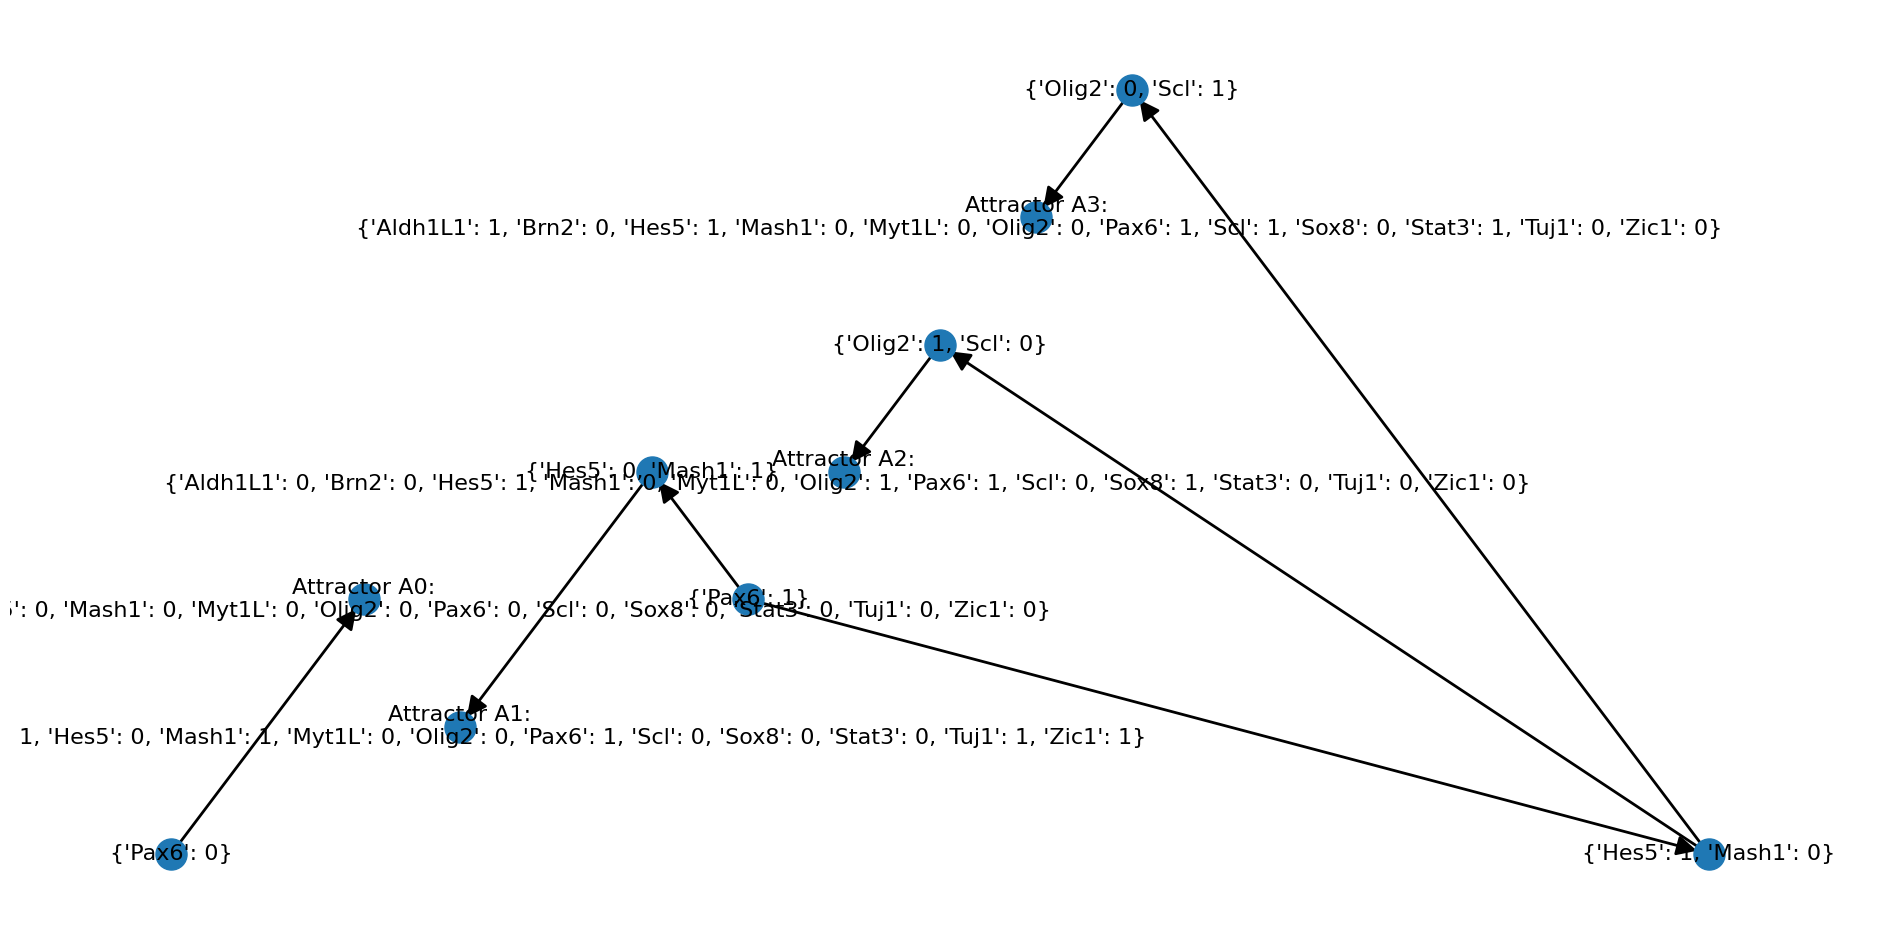

In [331]:
primes = bnet2primes("/home/spankaew/Git/astrologics/models/test_bonesis/bn0.bnet")

# Adjust the simulation size to avoid memory issues
max_simulate_size = 30

# Create the SD network
ar = sm.AttractorRepertoire.from_primes(primes, max_simulate_size=max_simulate_size)
GR=ex.networkx_succession_diagram_motif_based(ar,include_attractors_in_diagram=True)

ex.plot_nx_succession_diagram(GR)
state_1, adj_1 = calculate_SD_matrix(GR)

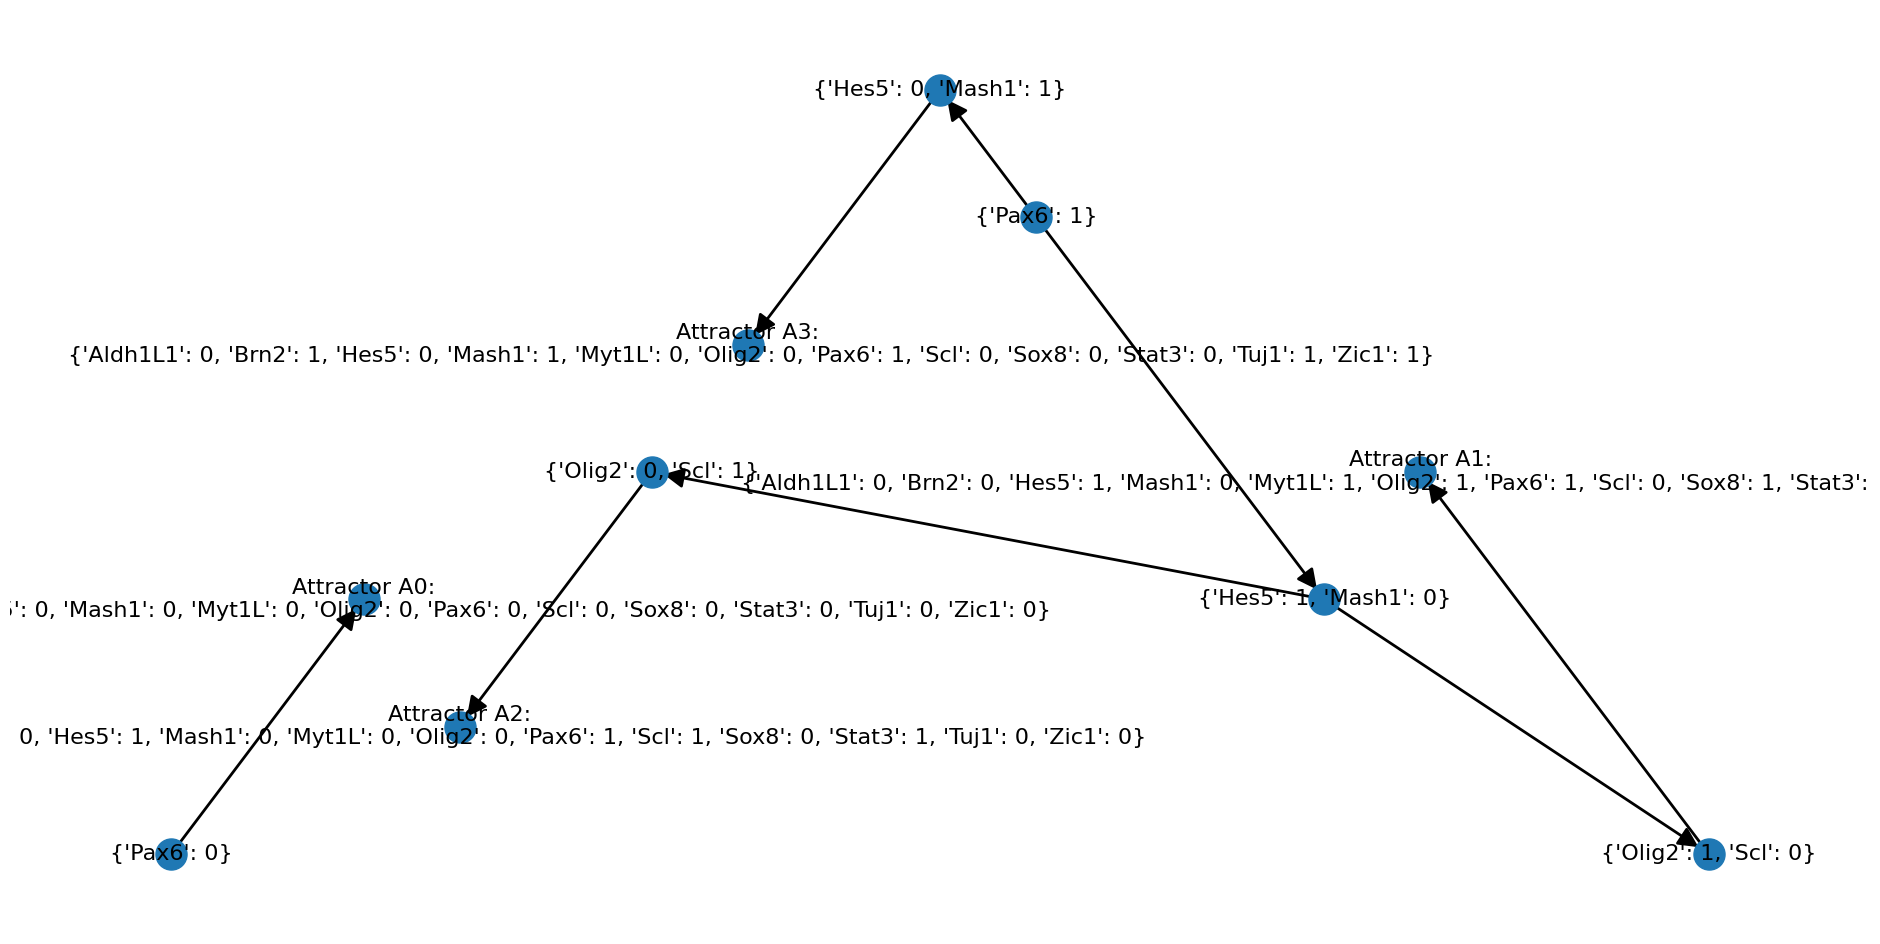

In [332]:
primes = bnet2primes("/home/spankaew/Git/astrologics/models/test_bonesis/bn2.bnet")

# Adjust the simulation size to avoid memory issues
max_simulate_size = 30

# Create the SD network
ar = sm.AttractorRepertoire.from_primes(primes, max_simulate_size=max_simulate_size)
GR=ex.networkx_succession_diagram_motif_based(ar,include_attractors_in_diagram=True)

ex.plot_nx_succession_diagram(GR)
state_2, adj_2 = calculate_SD_matrix(GR)

In [333]:
# Get the list of indices from both dataframes
indices_1 = state_1.index.tolist()
indices_2 = state_2.index.tolist()

# Create a set of unique indices
unique_indices = set(indices_1 + indices_2)

# Create a binary dataframe
binary_df = pd.DataFrame(index=list(unique_indices), columns=['state_1', 'state_2'], data=0)

# Mark the presence of indices in each dataframe
binary_df.loc[indices_1, 'state_1'] = 1
binary_df.loc[indices_2, 'state_2'] = 1

binary_df

,state_1,state_2
010100100011,1,1
0101*0*00011,1,0
010100*00011,0,1
1****0*101**,1,0
****0*1*****,1,0
*010******00,1,1
001011101000,0,1
101000110100,1,1
******1*****,0,1
1***00*101**,0,1


In [334]:
adj_1

,000000000000,****0*1*****,0101*0*00011,*010******00,0****1*010**,1****0*101**,000000000000,010100100011,001001101000,101000110100
000000000000,0,0,0,0,0,0,1,0,0,0
****0*1*****,0,0,1,1,0,0,0,0,0,0
0101*0*00011,0,0,0,0,0,0,0,1,0,0
*010******00,0,0,0,0,1,1,0,0,0,0
0****1*010**,0,0,0,0,0,0,0,0,1,0
1****0*101**,0,0,0,0,0,0,0,0,0,1
000000000000,0,0,0,0,0,0,0,0,0,0
010100100011,0,0,0,0,0,0,0,0,0,0
001001101000,0,0,0,0,0,0,0,0,0,0
101000110100,0,0,0,0,0,0,0,0,0,0


In [335]:
# Reorder adj_1 according to unique_indices and fill NA with 0
adj_1_reordered = adj_1.reindex(index=unique_indices, columns=unique_indices, fill_value=0)

# Reorder adj_2 according to unique_indices and fill NA with 0
adj_2_reordered = adj_2.reindex(index=unique_indices, columns=unique_indices, fill_value=0)

adj_1_reordered, adj_2_reordered

ValueError: cannot reindex on an axis with duplicate labels

In [338]:
import ginsim
import biolqm

lqm = biolqm.load("/home/spankaew/Git/astrologics/models/test_bonesis/bn2.bnet")
lrg = biolqm.to_ginsim(lqm)

ginsim.show(lrg)

In [342]:
fps = biolqm.fixpoints(lqm)
print(len(fps), "fixpoints")
ginsim.show(lrg, fps[3])

4 fixpoints


# Calculating SD for all models in the ensemble
In this part, I will adapt the script for calculating the model ensemble from the `GR` object. I will utilize the for loop to go through all the `.bnet` files here.

In [177]:
import pandas as pd
import os
from tqdm import tqdm

In [178]:
model_path = '/home/spankaew/Git/astrologics/models/test_bonesis/'
model_files = os.listdir(model_path)

# Setup the simulation size
max_simulate_size = 30

# Create a dictionary object to store models
models_net = {}

# Loop through the models
for i in tqdm(model_files): 
    # Adjust model name
    model_name = i.replace('.bnet','')
    primes = bnet2primes(model_path + i)
    ar = sm.AttractorRepertoire.from_primes(primes, max_simulate_size=max_simulate_size)
    models_net[model_name]=ex.networkx_succession_diagram(ar,include_attractors_in_diagram=True)

# Get the lits of nodes names
node_name = list(primes.keys())

100%|██████████| 88/88 [00:11<00:00,  7.79it/s]


In [179]:
# Extract states from GM nodes
states = [data['states'] for _, data in models_net['bn3'].nodes(data=True) if 'states' in data]

# Convert to DataFrame
states_df = pd.DataFrame(states)
# Convert values to int or logical value
states_df = states_df.map(lambda x: int(x) if pd.notnull(x) else '*')
states_df_strings = states_df.apply(lambda row: ''.join(row.astype(str)), axis=1)
states_df_dict = pd.Series(list(states_df_strings.astype(str)), index=list(models_net['bn3'].nodes()), ).to_dict()

# Set the index to the keys
states_df.index = states_df_strings
states_df.fillna('*',inplace=True)

,Aldh1L1,Brn2,Hes5,Mash1,Myt1L,Olig2,Pax6,Scl,Sox8,Stat3,Tuj1,Zic1
************,*,*,*,*,*,*,*,*,*,*,*,*
000000000000,0,0,0,0,0,0,0,0,0,0,0,0
******1*****,*,*,*,*,*,*,1,*,*,*,*,*
*010**1***00,*,0,1,0,*,*,1,*,*,*,0,0
001011101000,0,0,1,0,1,1,1,0,1,0,0,0
101000110100,1,0,1,0,0,0,1,1,0,1,0,0
010100100011,0,1,0,1,0,0,1,0,0,0,1,1
000000000000,0,0,0,0,0,0,0,0,0,0,0,0
001011101000,0,0,1,0,1,1,1,0,1,0,0,0
101000110100,1,0,1,0,0,0,1,1,0,1,0,0


In [206]:
states_mtx = pd.DataFrame()
states_bin = pd.DataFrame()
for i in tqdm(list(models_net.keys())):
    # Extract states from GM nodes
    indexes = [data['index'] for _, data in models_net[i].nodes(data=True) if 'index' in data]
    labels = [data['label'] for _, data in models_net[i].nodes(data=True) if 'label' in data]
    states = [data['states'] for _, data in models_net[i].nodes(data=True) if 'states' in data]

    # Create a new label index
    new_index = []
    for idx, index in enumerate(indexes):
        if isinstance(index, int):
            new_index.append(labels[idx])
        elif isinstance(index, str):
            new_index.append(index)
    new_index

    # Convert to DataFrame
    states_df = pd.DataFrame(states)
    # Convert values to int or logical value
    states_df = states_df.map(lambda x: int(x) if pd.notnull(x) else '*')

    # Set index to the matrix 
    states_df = states_df[node_name]
    states_df_strings = states_df.apply(lambda row: ''.join(row.astype(str)), axis=1)
    new_index = [new_index[j]+'_'+states_df_strings[j] for j in range(len(states_df_strings))]

    states_df.index = new_index

    # Fill NA with *
    states_df.fillna('*',inplace=True)

    # Concatenate the matrix
    states_mtx = pd.concat([states_mtx, states_df], axis=0, ignore_index = False)
    states_mtx = states_mtx[~states_mtx.index.duplicated(keep='first')]

    # Count the index from each of the models
    states_bin = pd.concat([states_bin, states_df.index.value_counts()], axis=1, ignore_index = False)
    states_bin.fillna(0, inplace=True)

states_bin.columns = list(models_net.keys())


100%|██████████| 88/88 [00:00<00:00, 223.04it/s]


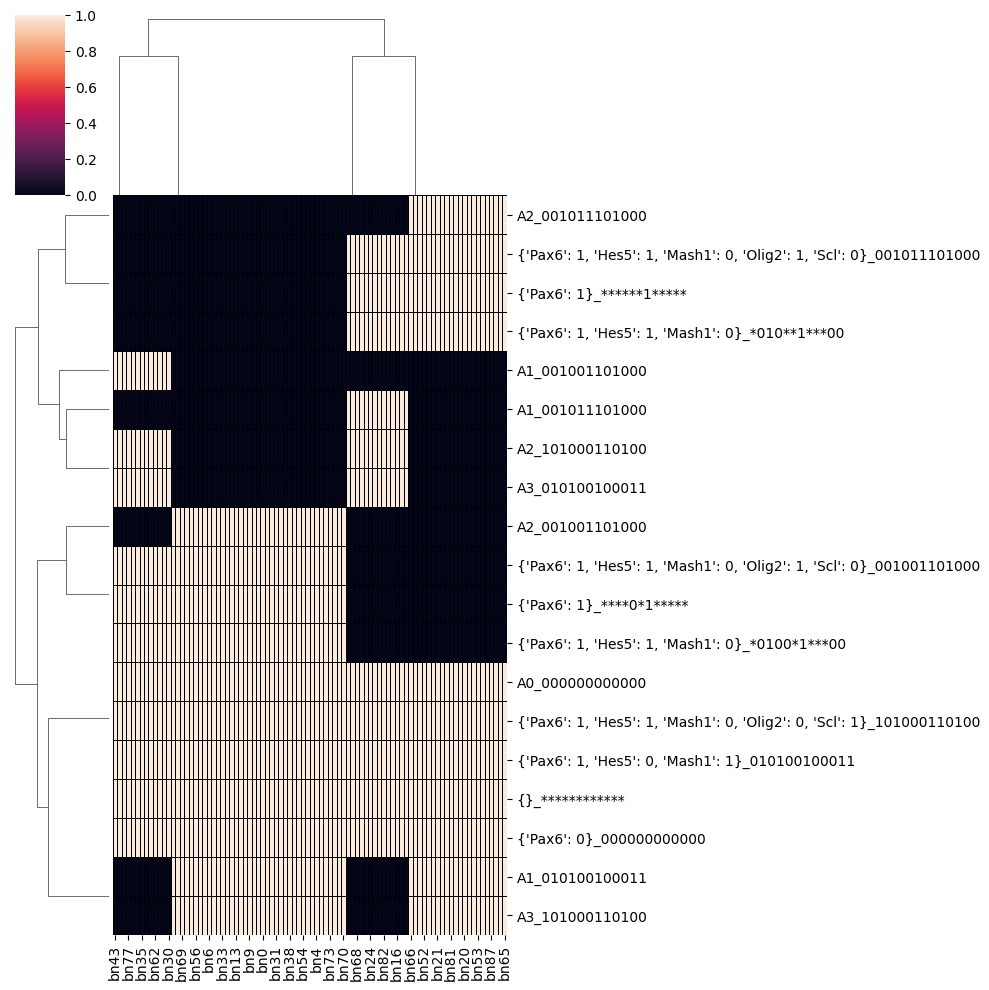

In [235]:
import seaborn as sns
sns.clustermap(states_bin, linewidth = .5, linecolor ='black')

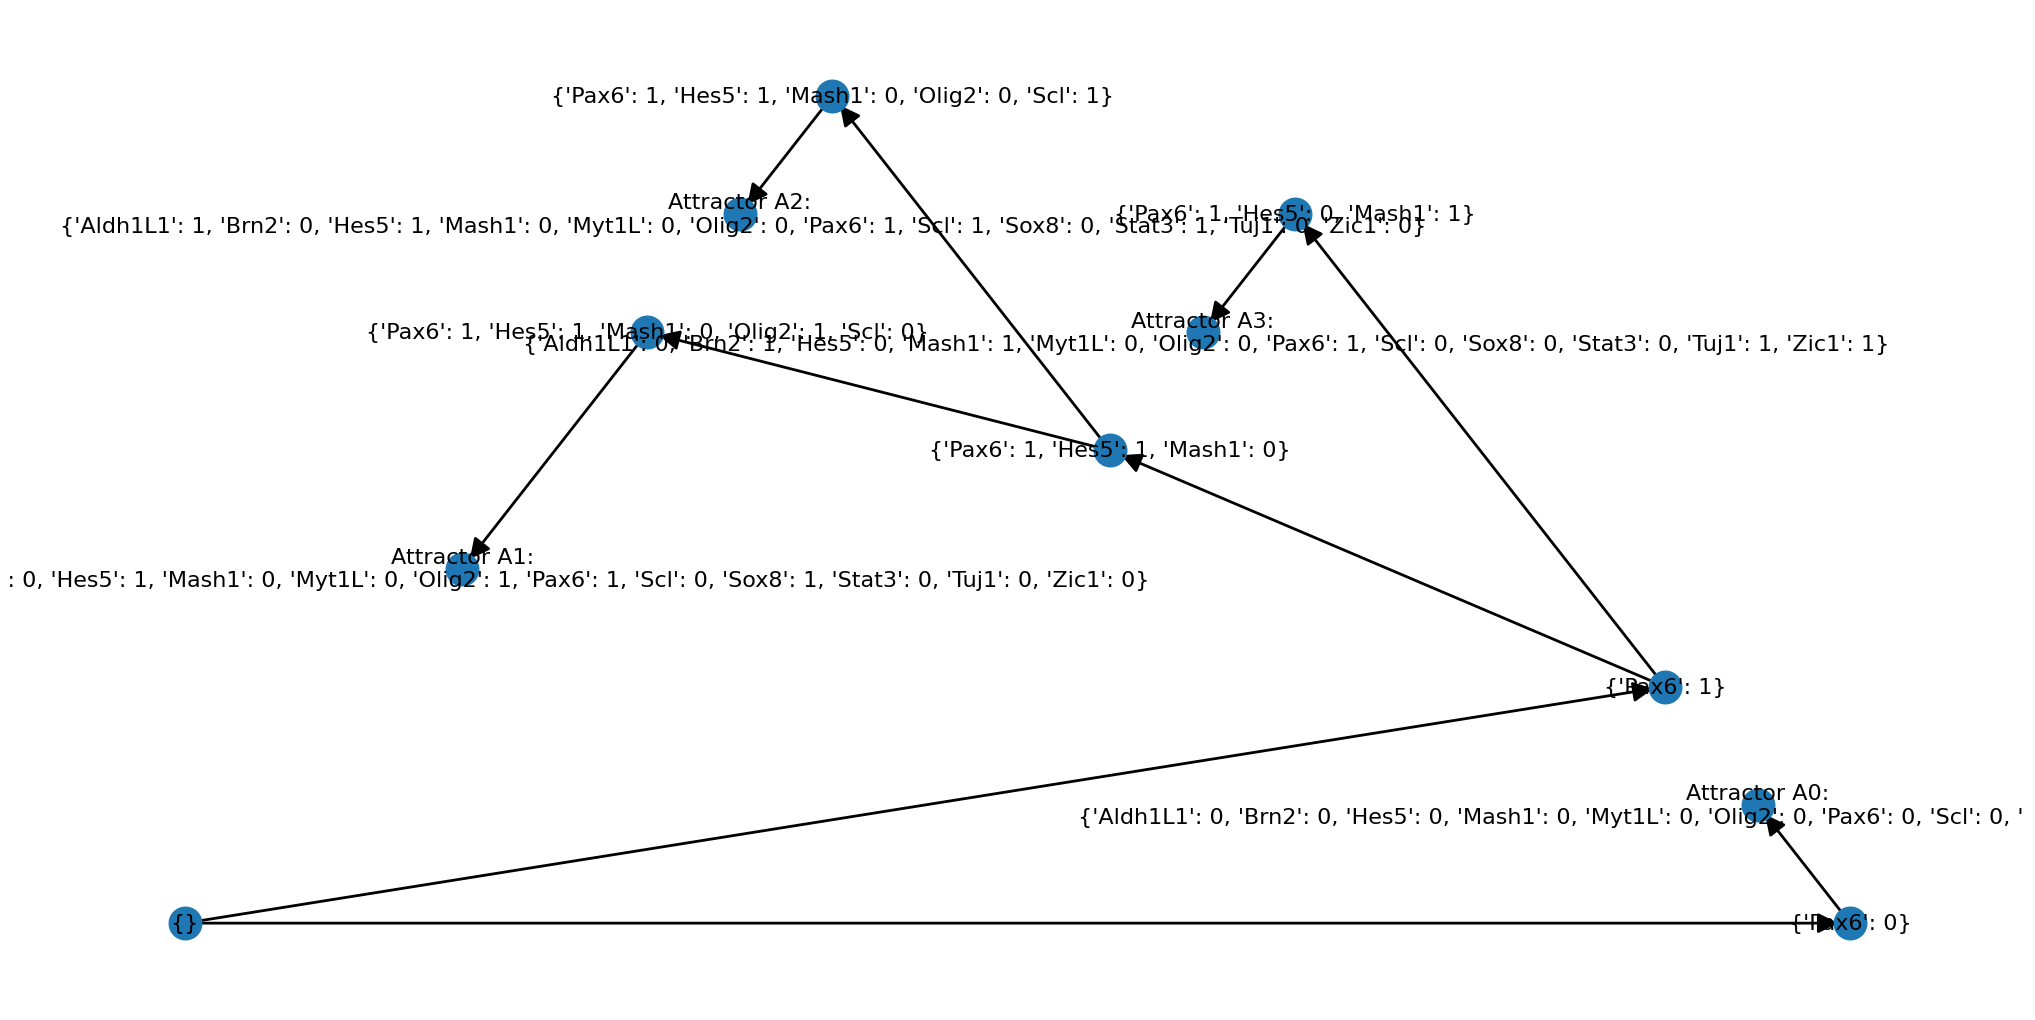

In [220]:
ex.plot_nx_succession_diagram(models_net['bn43'])

# Calculating the SD network distances

In [231]:
from netrd.distance import DeltaCon

# Initialize DeltaCon
deltacon = DeltaCon()

# Create a dictionary to store distances
distances = {}

# Compute distances between all pairs of networks
for model1 in tqdm(models_net):
    for model2 in models_net:
        if model1 != model2:
            distance = deltacon.dist(models_net[model1], models_net[model2])
            distances[(model1, model2)] = distance

distances_df = pd.DataFrame.from_dict(distances, orient='index', columns=['Distance'])
distances_df.index = pd.MultiIndex.from_tuples(distances_df.index, names=['Model1', 'Model2'])
distances_df = distances_df.unstack(level=-1)

  0%|          | 0/88 [00:00<?, ?it/s]/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/netrd/utilities/graph.py:74: RuntimeWarning: Coercing directed graph to undirected.
  warnings.warn("Coercing directed graph to undirected.", RuntimeWarning)
100%|██████████| 88/88 [00:13<00:00,  6.39it/s]


/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


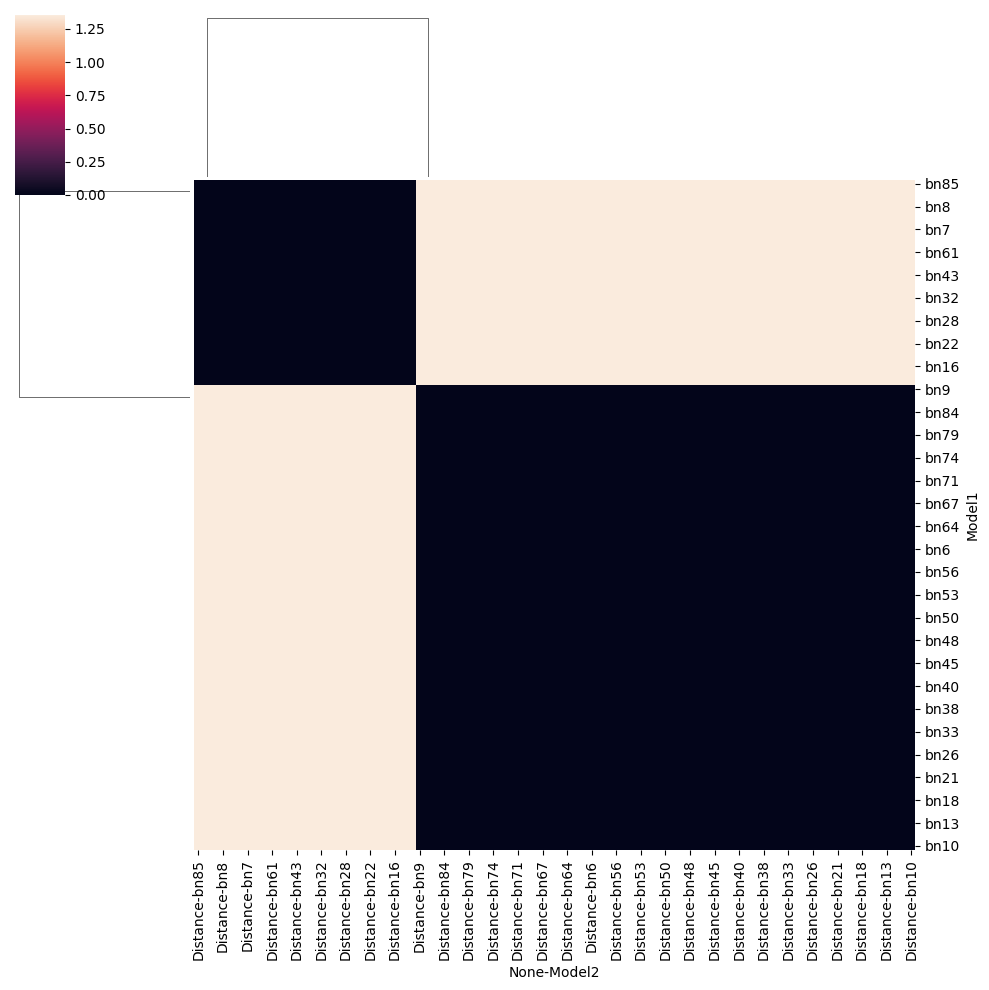

In [233]:
sns.clustermap(distances_df.fillna(0))

In [239]:
from netrd.distance import JaccardDistance

# Initialize DeltaCon
jaccrd = JaccardDistance()

# Create a dictionary to store distances
distances = {}

# Compute distances between all pairs of networks
for model1 in tqdm(models_net):
    for model2 in models_net:
        if model1 != model2:
            distance = jaccrd.dist(models_net[model1], models_net[model2])
            distances[(model1, model2)] = distance

distances_df = pd.DataFrame.from_dict(distances, orient='index')
distances_df.index = pd.MultiIndex.from_tuples(distances_df.index, names=['Model1', 'Model2'])
distances_df = distances_df.unstack(level=-1)

100%|██████████| 88/88 [00:01<00:00, 79.30it/s]


In [244]:
JaccardDistance.dist()

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


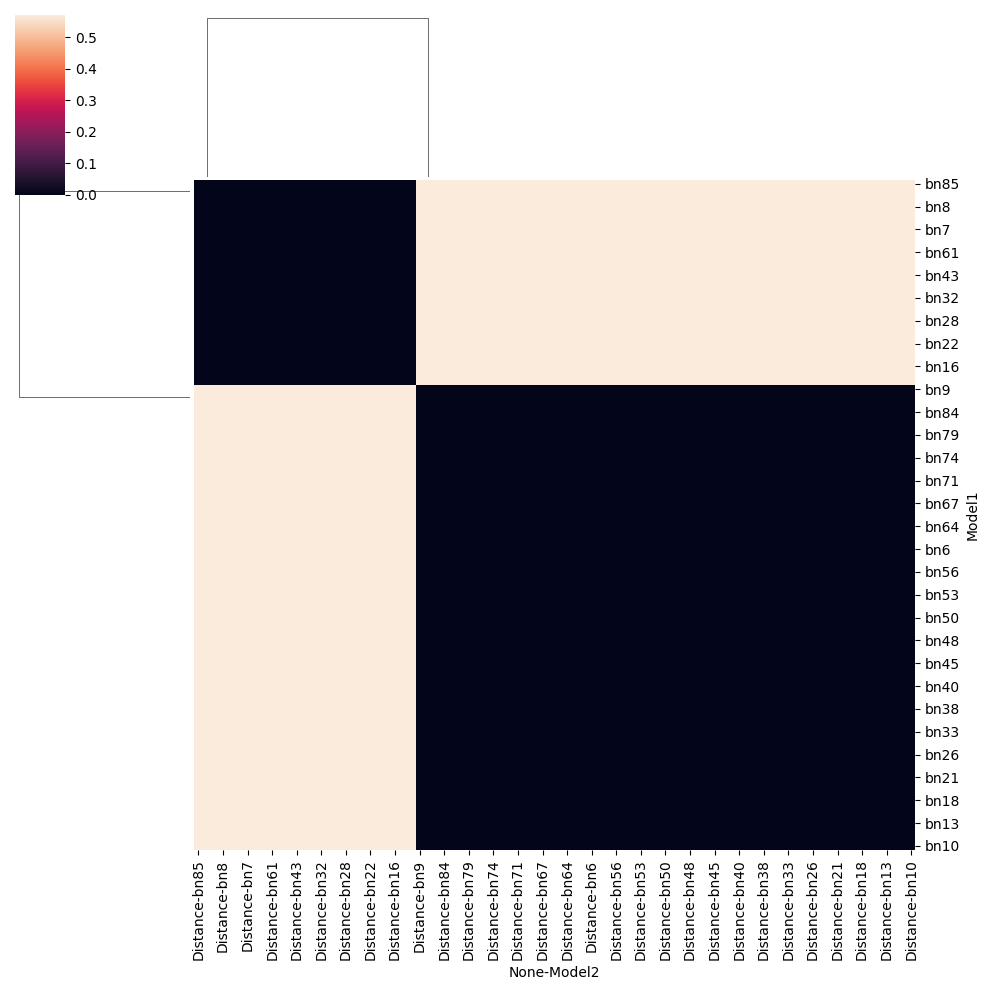

In [237]:
sns.clustermap(distances_df.fillna(0))